<a href="https://colab.research.google.com/github/Cindy12MYG/PUC/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import skimage as sk # load skimage libraries
from skimage import io
file_path = '/content/drive/MyDrive/Images/dog_image.jpg'
Ic = sk.io.imread(file_path) # read image using imread function
Ic.shape # 3 matrices : couleur

(300, 300, 3)

In [3]:
IG = sk.color.rgb2gray(Ic)
IG.shape # 1 matrice : gris

(300, 300)

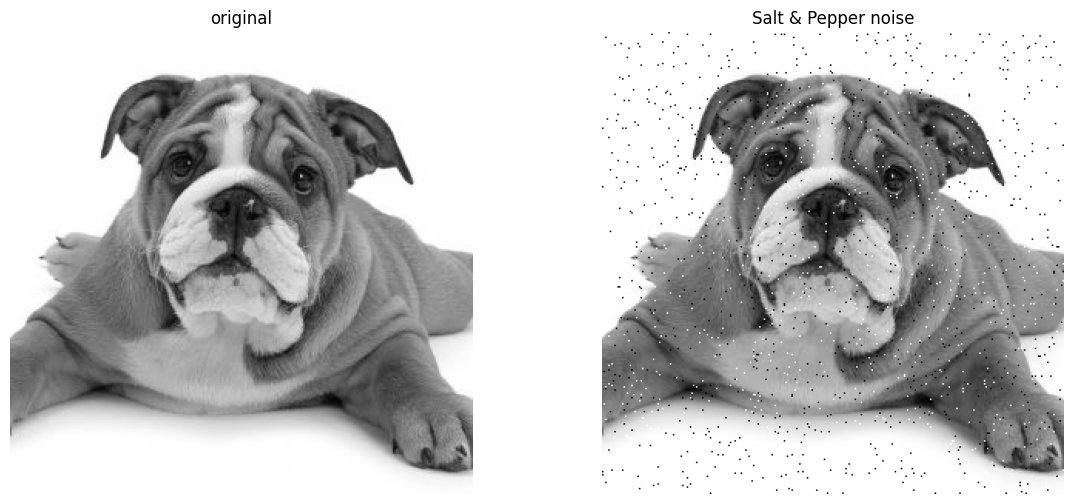

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

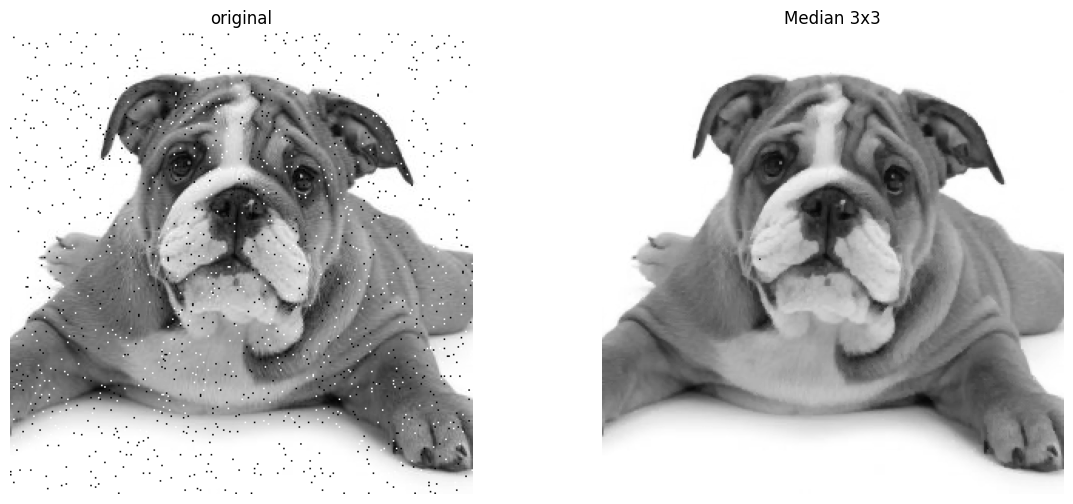

In [5]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel3 = disk(1) # structuring element disk radius 3 pixels
img_med3x3 = median(img, sel3)
plot_comparison(img,img_med3x3,'Median 3x3')
plt.savefig('median.png')

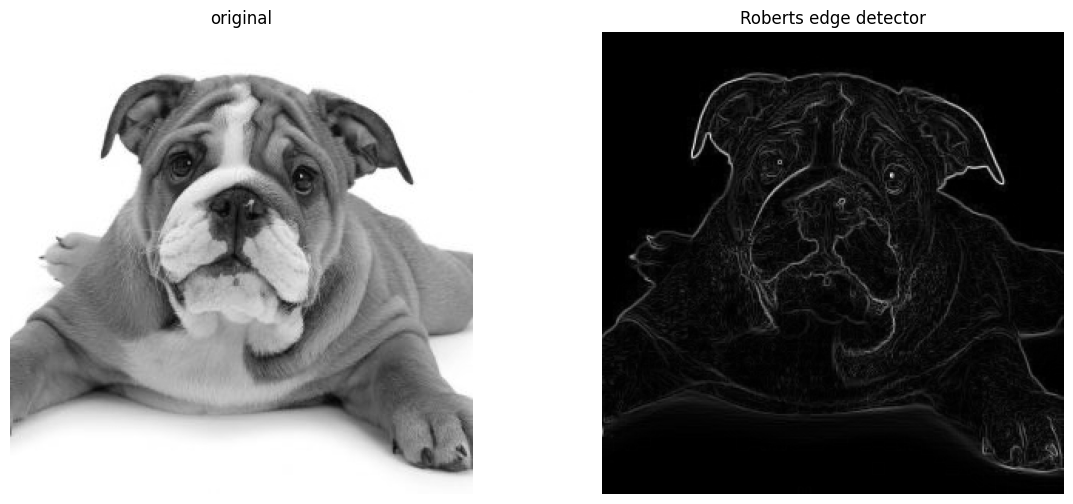

In [6]:
# contour

import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import roberts

image = IG

edge_roberts = roberts(image)
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')

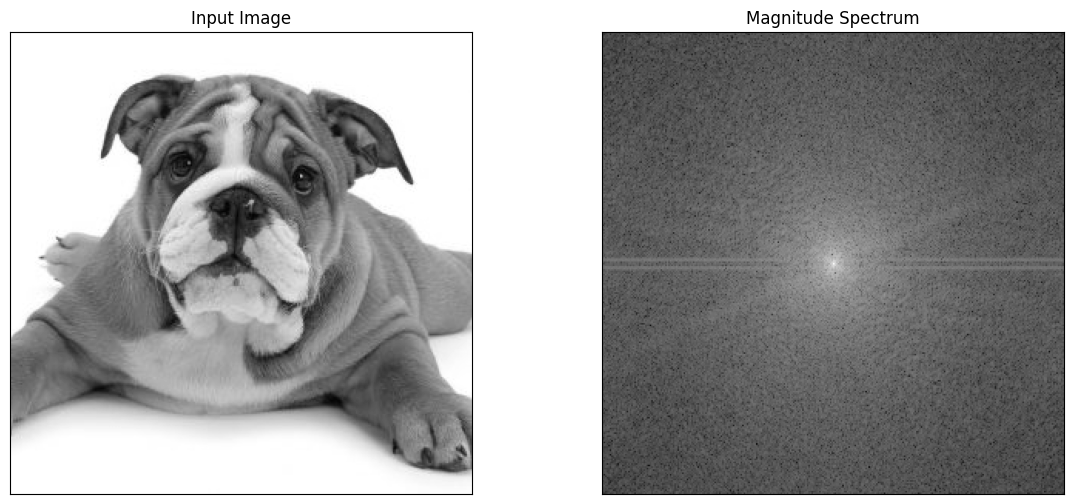

In [7]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

img = IG

f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.savefig('frequency.png')
plt.show()

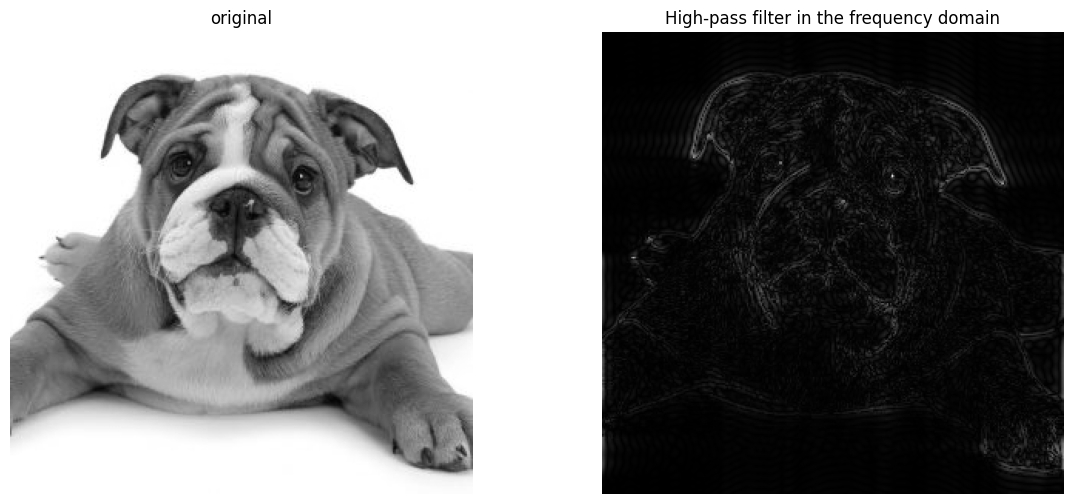

In [8]:
rows, cols = img.shape
crow, ccol = np.int64(rows/2) , np.int64(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

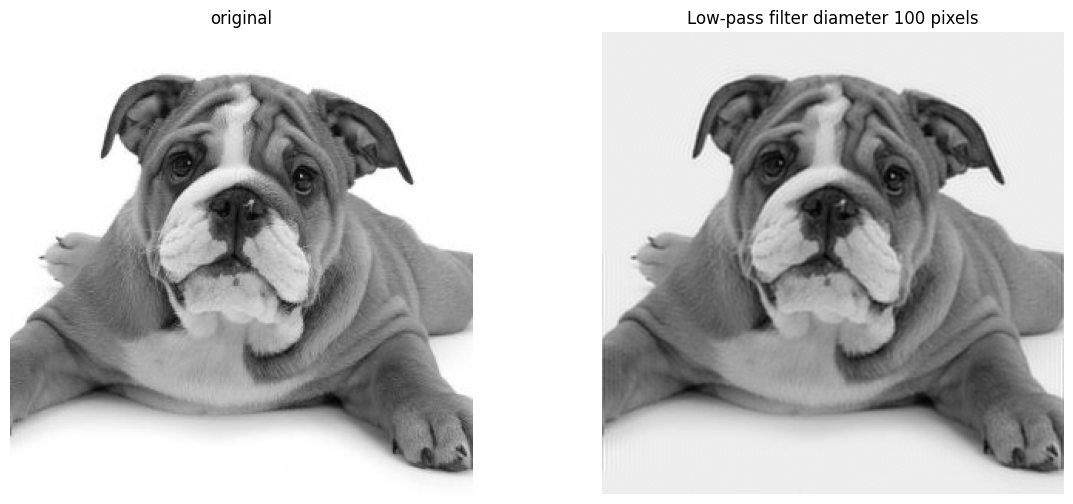

In [9]:
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

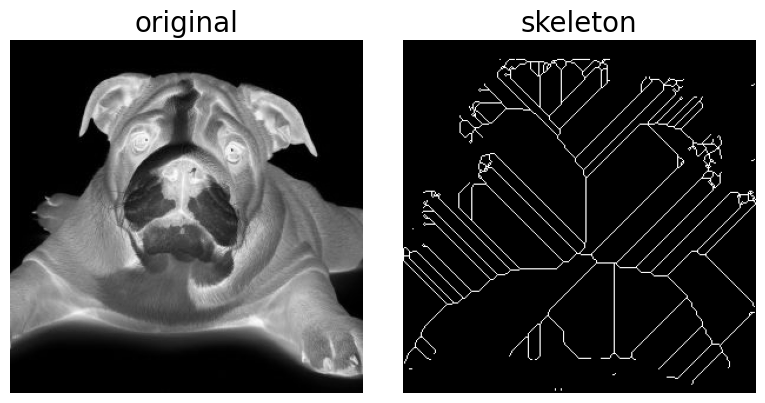

In [10]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(img)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()